# How is average Math and ELA proficiency related to racial demographics, economic need, and quality of school?
## Introduction

Of New York City's highschools, nine "Specialized High Schools" are set apart as elite institutions made up of some of the brightest students in the city. These schools offer a variety of academic and art programs to students who are deemed worthy of attending. With the exception of Fiorello H. LaGuardia High School—which is the only specialized school dedicated to the arts—New York City's specialized schools grant admission based on performance on the Specialized High Schools Admissions Test (SHSAT). The SHSAT is a standardized test that an average of 30,000 students acriss New York's school participate in each year. And though the SHSAT's purpose is to isolate academic merit alone to determine admission into these top schools, Black and Hispanic students are severely underrepresented in New York City's Specialized High Schools.

Various factors may be at play in contributing to this problem, and there is not one single cause that is responsible for the misrepresentation of New York's student population in these schools. As the specialized schools have a proven track record of helping their students grow and succeed beyond what would be expected at non-specialized schools, it is imperative that the causes behind the aforementioned issues are uncovered.

Datasets from PASSNYC provide information on primary and middle schools in New York. The data include geographical information, racial demographics, socioeconomic variables, and overall performance and quality measurerments of each school and its student body. We also have data on 30 schools in District 5 (Manhattan), pertaining to their participation in the SHSAT (i.e: the number of registrations and tests taken) between 2013 and 2016. However, we instead refer to the 2016-2017 SHSAT Admissionss and Test Offers dataset from the New York City Department of Education, which contains similar data for many more New York City schools. Using these  datasets*, we seek to identify potential causes behind the lack of representation of Black and Hispanic students in New York City's Specialized High Schools. Specifically, we investigate how racial demographics, economic need, and measures of school quality are related to the racial make up of schools, and how they may impact academic performance in Math and English, which we assume to be indicative of performance on the SHSAT. We refer to the literature pertaining to these issues to explain trends that are observed within this dataset.

Additionally, we also combine school data into averages per zipcode in New York City. In doing so, we can investigate whether geographical patterns can help explain the difference between academic performance, SHSAT participation, and hence representation in New York City's Specialized High Schools between Black and Hispanic students and their Asian and White counterparts. Furthermore, we also scrape population data on New York City's zipcodes, and inspect how the population of a given zipcode might be correlated with factors that affect academic performance.

*The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter School have been omitted from the data due to their quality scores likely being misreported. While all other schools report "Rigorous Instruction %" scores of around 90%, these three schools have scores of 0%. As there are over 1000 schools in the dataset, the removal of 3 data points will not significantly affect results.


# Project One

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# activate plot theme

#Loading Data
school = pd.read_csv('~/ECO225 Project/Data/2016 School Explorer.csv')

#Cleaning data - Converting percentages into floats

def percentfloat(var):
    return float(var.replace('%',''))

races = ['Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']
for r in races:
    school[r] = school[r].apply(percentfloat)
races.remove('Percent Black / Hispanic')

quality = ['Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %',
           'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']
for q in quality:
    school[q] = school[q].apply(str).apply(percentfloat)

#Dropping rows with 0% for quality percentages - these are likely recording issues as all but 3 data points have 
#much higher scores of Rigorous Instruction.
school = school.drop(school.index[school['Rigorous Instruction %'] == 0].tolist())


data = school


#New columns for average academic performance, average quality of school
data['Academic Performance'] = data[['Average ELA Proficiency', 'Average Math Proficiency']].mean(axis = 1)
data['Average Quality'] = data[quality].mean(axis = 1)

def qs(column):
    Qs = []
    for i in [0.25, 0.5, 0.75]:
        Qs.append(data[column].quantile(i))
    return Qs

def quartiles(df):
    if df <= Qs[0]:
        return "Q1"
    elif Qs[0] < df <= Qs[1]:
        return "Q2"
    elif Qs[1] < df <= Qs[2]:
        return "Q3"
    elif Qs[2] < df:
        return "Q4"

Qs = qs('Average Math Proficiency')
data['Math Quartiles'] = data['Average Math Proficiency'].apply(quartiles)

Qs = qs('Average ELA Proficiency')
data['ELA Quartiles'] = data['Average ELA Proficiency'].apply(quartiles)

Qs = qs('Academic Performance')
data['Academic Quartiles'] = data['Academic Performance'].apply(quartiles)

Qs = qs('Economic Need Index')
data['ENI Quartiles'] = data['Economic Need Index'].apply(quartiles)

Qs = qs('Average Quality')
data['Quality Quartiles'] = data['Average Quality'].apply(quartiles)

Qs = qs('Percent Black / Hispanic')
data['BH Quartiles'] = data['Percent Black / Hispanic'].apply(quartiles)

#Dividing schools by proporotion of Black / Hispanic students
BH_description = ['<25%', '25% - 50%', '50% - 75%', '>75%']
def BH(df):
    q = [0, 25, 50, 75, 100]
    for i in range (0, 4):
        if q[i] <= df < q[i + 1]:
            return BH_description[i]

data['BH Description'] = data['Percent Black / Hispanic'].apply(BH)

### The Distributions of Academic Proficiency in New York Schools

The SHSAT consists of an English and a Mathematics section. Though other minor factors may affect performance on the SHSAT, students' preformance in English and Math during primary and middle school may be predictive of their SHSAT scores, and hence admission to New York's specialized schools. As such, the dependent variables of our analysis will be a school's average scores in Math and ELA proficiency tests.

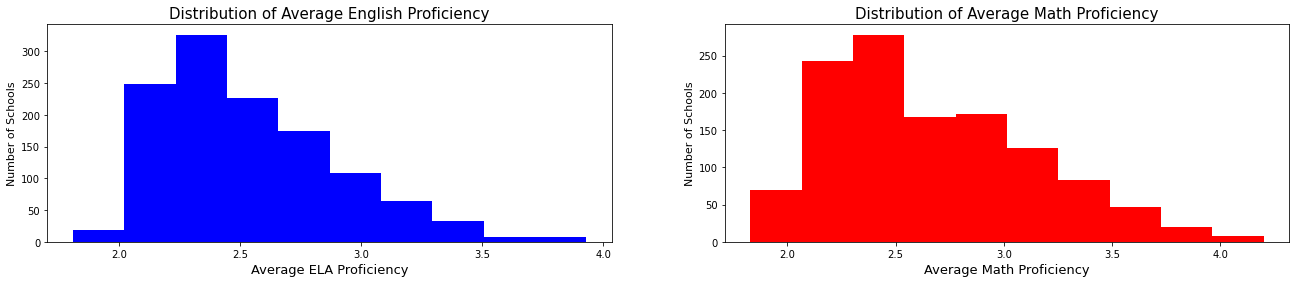

In [79]:
#Histogram of dependant variables: Average ELA / Math Proficiency Scores

fig, axs = plt.subplots(1, 2)
axs[0].hist('Average ELA Proficiency', color = 'b', data = data)
axs[0].set_title('Distribution of Average English Proficiency', fontsize = 15)
axs[0].set_xlabel('Average ELA Proficiency', fontsize = 13)
axs[0].set_ylabel('Number of Schools', fontsize = 11)

axs[1].hist('Average Math Proficiency', color = 'r', data = data)
axs[1].set_title('Distribution of Average Math Proficiency', fontsize = 15)
axs[1].set_xlabel('Average Math Proficiency', fontsize = 13)
axs[1].set_ylabel('Number of Schools', fontsize = 11)

plt.subplots_adjust(right = 3)

With the data provided, we see that most schools have average ELA and Math scores between 2.0 and 3.0, though some schools perform significantly above average; the data is right skewed. The distribution of ELA and Math scores are similar. Sincee the purpose of our analysis is to identify characteristics that high performing schools have in common and the areas in which struggling schools differ the most from the mean, rather than studying Math and ELA scores separately, we will instead look at relationships between independent variables and the simple mean of the average ELA and Math scores.

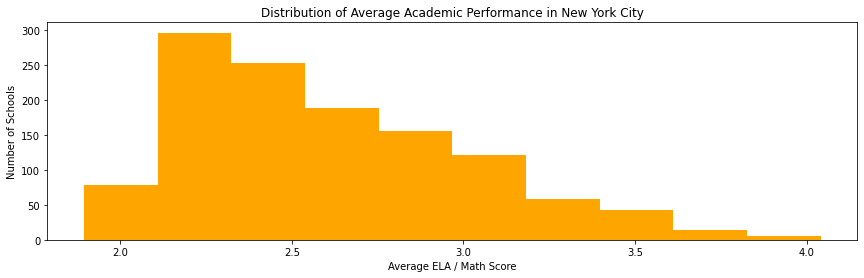

In [80]:
plt.hist('Academic Performance', color = 'orange', data = data)
plt.title('Distribution of Average Academic Performance in New York City')
plt.xlabel('Average ELA / Math Score')
plt.ylabel('Number of Schools');
plt.subplots_adjust(right = 2)

The distribubtion of overall academic performance mirrors that of ELA and Math scores.

### Distribution of Students' Race in New York Schools

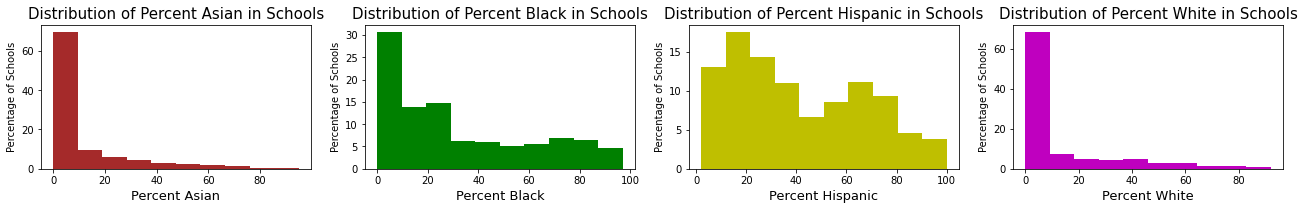

In [81]:
#Histograms of percentages of races
fig, axs = plt.subplots(1,4)
i = 0
k = 0
color = ['brown', 'g', 'y', 'm']

for r in races:
    axs[k].hist(r, color = color[i], data = data, weights=np.ones(len(data)) * 100 / len(data))
    axs[k].set_title("Distribution of " + r +' in Schools', fontsize = 15)
    axs[k].set_xlabel(r, fontsize = 13)
    axs[k].set_ylabel('Percentage of Schools', fontsize = 10)
    i += 1
    k += 1

plt.subplots_adjust(right = 3, top = 1, bottom = 0.5)

Summary statistics and histograms show that New York City's schools are diverse. While there are schools with few Asian or White students, there are few schools that are completely dominated by a given race. As the focus of our study is to determine the causes behind the small relative proportion of Black and Hispanic students in New York's specialized schools, we will plot variables of interest against racial demographics to pick out patterns and relationships which may be of interest.

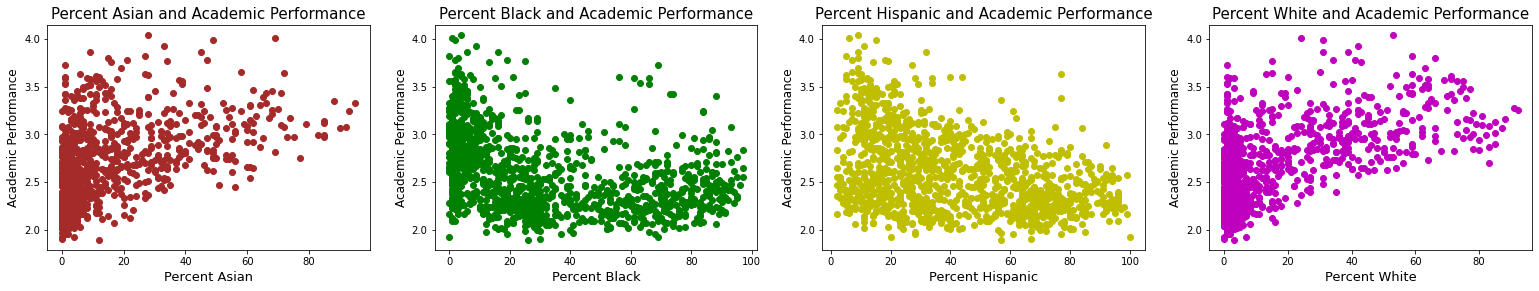

Percent Asian  Percent Black  Percent Hispanic  Percent White
ELA Quartiles                                                               
Q1                  2.363934      38.573770         55.626230       2.108197
Q2                  5.880795      42.625828         45.632450       4.079470
Q3                 14.511327      32.184466         38.822006      12.501618
Q4                 24.500000      13.399329         24.043624      34.959732

Percent Asian  Percent Black  Percent Hispanic  Percent White
Math Quartiles                                                               
Q1                   2.423077      44.618590         49.253205       2.349359
Q2                   5.186047      41.013289         47.847176       4.162791
Q3                  13.929530      27.070470         42.634228      14.268456
Q4                  25.788779      14.003300         24.534653      32.732673

Percent Asian  Percent Black  Percent Hispanic  \
Academic Quartiles                                                   
Q1                       2.418301      41.924837         51.970588   
Q2                       4.850498      42.757475         46.910299   
Q3                      14.036304      28.861386         41.359736   
Q4                      25.753289      13.592105         24.187500   

                    Percent White  
Academic Quartiles                 
Q1                       2.326797  
Q2                       3.764120  
Q3                      13.610561  
Q4                      33.509868

In [82]:
fig, axs = plt.subplots(1, 4, figsize = (15, 5))

i = 0
k = 0
for r in races:
    axs[k].plot(r, 'Academic Performance', 'o', color = color[i], data = data)
    axs[k].set_title(r + ' and Academic Performance', fontsize = 15)
    axs[k].set_xlabel(r, fontsize = 13)
    axs[k].set_ylabel('Academic Performance', fontsize = 12)
    i += 1
    k += 1
plt.subplots_adjust(right = 1.5, top = 0.75, wspace = 0.2)
plt.show()

english = data.groupby('ELA Quartiles')
math = data.groupby('Math Quartiles')
academic = data.groupby('Academic Quartiles')

display(english[races].mean(), math[races].mean(), academic[races].mean())

Unfortunataely, as the distribution of students in New York's specialized schools would suggest, there seems to be a relationshsip between the racial makeup of schools and academimc performance. Schools with more White and Asian students perform better in both subjects, relative to predominantly Black or Hispanic schools. More specifically, ranking schools by their performance on proficiency tests, we see that for Math and English individually, as well as for overall Academic Performance, top performaing schools have higher proportions of Asian and White students, while schools with the lowest average scores have higher percentages of Black and Hispanic students. 

The data verifies what was already suspected.  Notably, however, the spread of schools' performances is high. While there is a negative trend betwewen Percentage of Black or Hispanic students and Academic Performance, some high performing schools have high percentages of Black or Hispanic students. Thus, providing aid strictly based on race may not be the best use of resources. Identifing and remedying the causes behind the negative trend will be more effective and efficient.

### Race, Economic Need, and Academic Success

One determinant of academic success that has been heavily studied is one's socioeconomic status (SES). Brownell et al. (2006) find that even at a Grade 3 level, students with low SES—which is strongly determined by a family's financial stability—had a pass rate on Language Arts tests 34 percentage points lower than students from with high socioeconomic status. In another approach, Janus and Duku (2007) find a positive correlation between students' family incomes and teachers' assessments of their readiness for school through their assigned Early Development Instrument (EDI) score. Forget-Dubois et al. (2007) show that variations in students' EDI scores account for 36% of variation in their eventual academic achievement. Hence, we begin our invetigation by inspecting relationships between racial demographics and economic need.

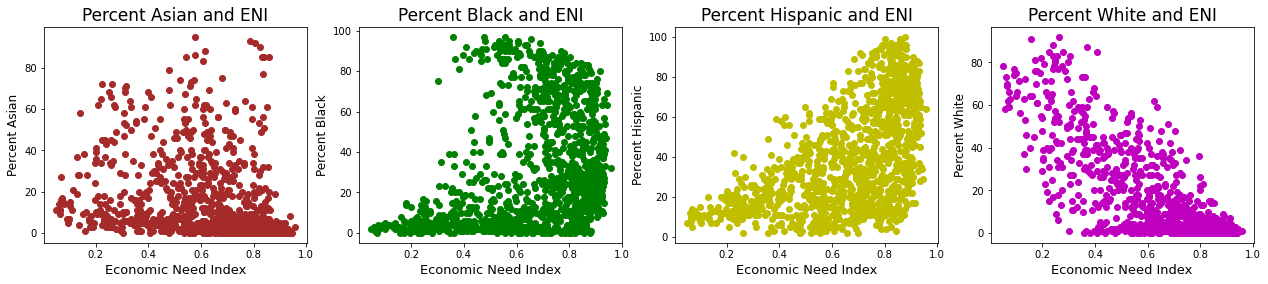

In [83]:
#Economic Need and Race

fig, axs = plt.subplots(1,4)
i = 0
k = 0
for r in races:
    axs[k].plot('Economic Need Index', r, 'o', color = color[i], data = school)
    axs[k].set_title(r + ' and ENI', fontsize = 17)
    axs[k].set_xlabel('Economic Need Index', fontsize = 13)
    axs[k].set_ylabel(r, fontsize = 12)
    i += 1
    k += 1
plt.subplots_adjust(left = 0, right = 2.8, bottom = 0.75, top = 1.5)

Scatter plots show that the racial makeup of a school is correlated with economic need. While schools with higher proportion of White students are less likely to be economically disadvantaged, there is strong positive correlation between ENI and the percentage of black Black or Hispanic students. Though there are exceptions, there is a slight negative relationship between ENI and the percentage of Asian students in a given school.


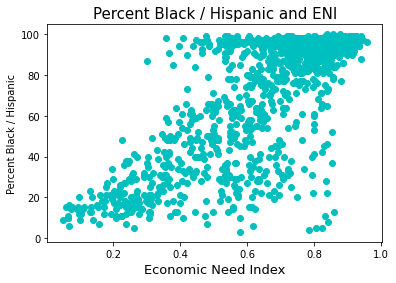

In [84]:
#ENI and Black / Hispanic
plt.plot('Economic Need Index', 'Percent Black / Hispanic', 'o', color = 'c', data = school)
plt.title('Percent Black / Hispanic and ENI', fontsize = 15)
plt.xlabel('Economic Need Index', fontsize = 13)
plt.ylabel('Percent Black / Hispanic', fontsize = 10);

When looking at the percentage of students whos are either Black or Hispanic, the relationship with ENI is even more defined. Schools in New York City that are mostly populated by Black or Hispanic students are less well off than those with predominantly White or Asian students.

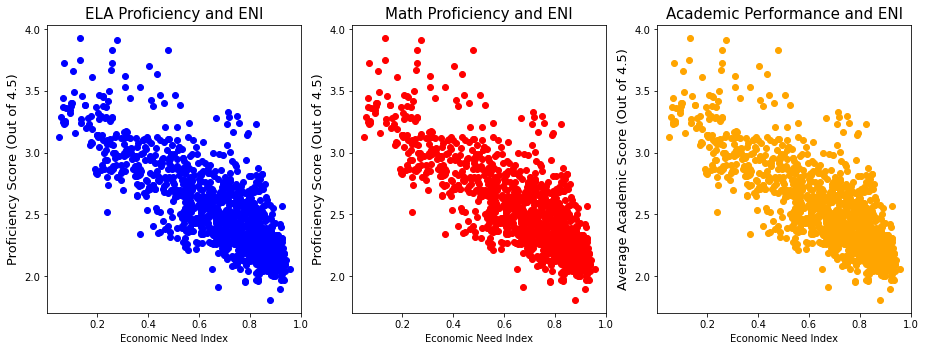

In [85]:
fig, axs = plt.subplots(1,3)

axs[0].plot('Economic Need Index', 'Average ELA Proficiency', 'o', color = 'b', data = data)
axs[0].set_title('ELA Proficiency and ENI', fontsize = 15)
axs[0].set_ylabel('Proficiency Score (Out of 4.5)', fontsize = 13)
axs[0].set_xlabel('Economic Need Index', fontsize = 10)

axs[1].plot('Economic Need Index', 'Average ELA Proficiency', 'o', color = 'r', data = data)
axs[1].set_title('Math Proficiency and ENI', fontsize = 15)
axs[1].set_ylabel('Proficiency Score (Out of 4.5)', fontsize = 13)
axs[1].set_xlabel('Economic Need Index', fontsize = 10)

axs[2].plot('Economic Need Index', 'Average ELA Proficiency', 'o', color = 'orange', data = data)
axs[2].set_title('Academic Performance and ENI', fontsize = 15)
axs[2].set_ylabel('Average Academic Score (Out of 4.5)', fontsize = 13)
axs[2].set_xlabel('Economic Need Index', fontsize = 10)

plt.subplots_adjust(left = 1, right = 3, bottom = 0, top = 1)


#### The Significance of Race and Economic Need

The data clearly show that academic success is negatively correlated with economic need; the more economically disadvantaged students at a school are, the worse they score on Math and English proficiency tests. This is also reflected in their overall average academic performance. Evidently, economic well being has an influence on a student's academic success. With such a strong correlation between Black and Hispanic population and ENI, providing aid to schools that are the most financially disadvantaged will improve Black and Hispanic students' academic success the most, and may make the distributions of New York's Specialized High Schools' student populations more equitable.

However, simply giving money to poorer schools is unlikely to guarantee improvements to students' performances. It is plausible that other factors, namely the quality of teaching and institution, might also have an effect on the academic success of each school's students.

### Quality of Teaching at New York High Schools

Every year, the New York School board conducts student, teacher, and parent surveys to guage the quality of each schoool. There are 6 categories in the survey. According to the Framework & School Survey Scoring Technical Guide: 

"Rigorous Instruction" describes the extent to which a school encourages critical thinking, student engagement, and adheres to the Common Core. Questions in this sections ask students about guidance teachers provide them.

"Collaborative Teachers" describes teachers' engagement in the community. It asks students about diversity in teachers' curricula, and teachers' abilities to adapt to different backgrounds. It also asks teachers about collaboration between faculty, and building of a school community.

"Supportive Environment" describes the amount of guidance and support teachers provide students along their academic journey. Students answer questions regarding academic and social support, including the amount of assistance when they fall behind or feel unsafe. Notably, this section also asks students to describe the help teachers provide them regarding application processes, whether for high schools or post secondary institutions.

"Effective School Leadership" describes parents and teachers' view on the vision and performance of the school's principal or leader.

"Strong Family-Community Ties" describes the involvement of parents in school activity, from communications with teachers about their children, to participation in school events.

"Trust" describes the sense of community within the school. Students, teachers, and parents all respond to questions regarding the extent to which they believe the school is a safe and welcoming space.

Put together, these variables measure the qualitiy of each school. Scores are assigned based on the percentage of answers that are "positive". As each variable measures a different aspect of a school, we will inspect the relationship between each and academic performance.

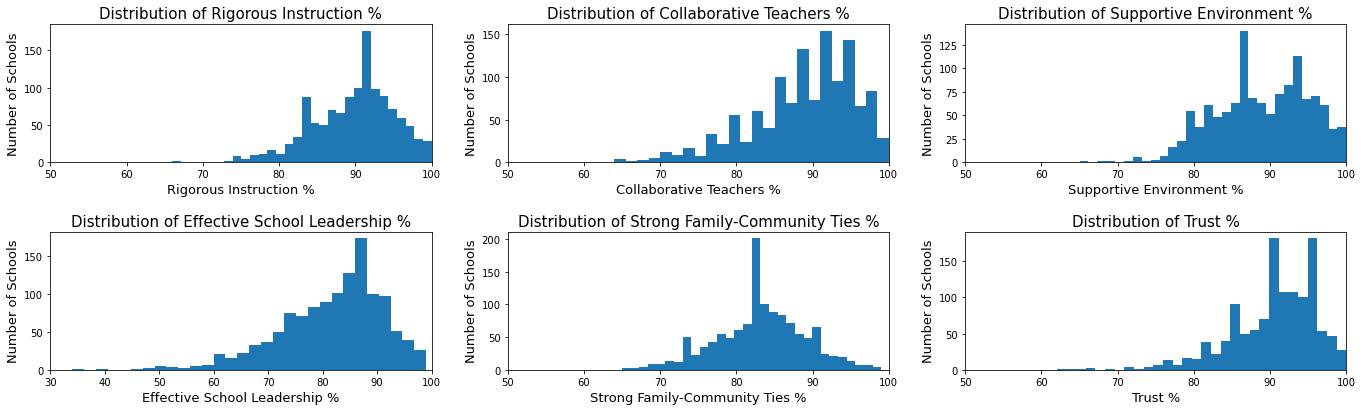

Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter School have been omitted from 
 the data due to their quality scores likely being misreported.


In [86]:
fig, axs = plt.subplots(2,3)
i = 0
j = 0
for q in quality:
    axs[i, j].hist(q, data = data, bins = 30)
    axs[i, j].set_title("Distribution of " + q, fontsize = 15)
    axs[i, j].set_ylabel('Number of Schools', fontsize = 13)
    axs[i, j].set_xlabel(q, fontsize = 13)
    axs[i, j].set_xlim(50, 100)
    j += 1
    if j == 3:
        j = 0
        i += 1
        
axs[1, 0].set_xlim(30, 100)        
plt.tight_layout
plt.subplots_adjust(left = 0, right = 3, bottom = 0.5, top = 1.7, hspace = 0.5)
plt.show()

print('Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter School '
      + 'have been omitted from \n the data due to their quality scores likely being misreported.')

Schools in New York typically score high on measures of school quality. While all relatively moundshaped, we see that measures of School Leadership and Family-Community Ties have highest variance.

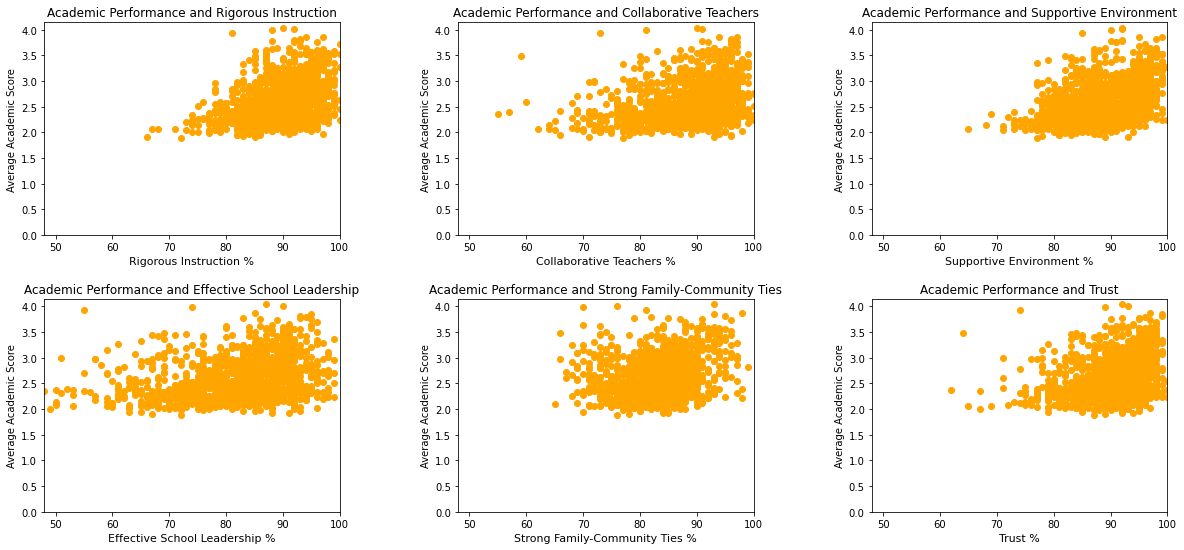

Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter School have been omitted from 
 the data due to their quality scores likely being misreported.


In [87]:
i = 0
j = 0
fig, axs = plt.subplots(2,3)
for q in quality:
    axs[i, j].plot(q, 'Academic Performance', 'o', color = 'orange', data = data)
    axs[i, j].set_xlim(48, 100)
    axs[i, j].set_title('Academic Performance and ' + q.replace('%',' ').strip(), fontsize = 12)
    axs[i, j].set_ylabel('Average Academic Score', fontsize = 10)
    axs[i, j].set_xlabel(q, fontsize = 11)
    axs[i, j].tick_params(axis = 'both', labelsize = 10)
    axs[i, j].set_ylim(0)

    
    if j == 2:
        i = 1
        j = -1
    j += 1
    
plt.subplots_adjust(left = 1.4, right = 4, bottom = 1.3, top = 3, hspace = 0.3, wspace = 0.4)
plt.show()



print('Note: The data for Stem Institute of Manhattan, P.S 150 Christopher, and Great Oaks Charter School '
      + 'have been omitted from \n the data due to their quality scores likely being misreported.')

The data show that for each measure of quality of schooling, a higher score is associated with better average academic scores. Family-Community Ties is an exception in that the trend is the least defined. However, for the rest of the measures of quality, the data suggests that improving on certain aspects of school quality can improve outcomes of students' learning.

In [88]:
i = 0
race_quantiles = []
for r in races:
    race_quantiles.append(r + ' Quartiles')
for r in races:
    Qs = qs(r)
    data[race_quantiles[i]] = data[r].apply(quartiles)
    i += 1

rdfs = ['Asian', 'Black', 'Hispanic', 'White']
i = 0
for r in races:
    rdfs[i] = data.groupby(race_quantiles[i])
    i += 1
    
for r in rdfs:
    display(r[quality].mean())

quality_stds = []
string = 'The standard deviations of measurements of school quality are: '
i = 0

for q in quality:
    quality_stds.append(str(round(data[q].std(), 3)))
    if q == 'Trust %':
                        string += 'and ' + q.replace('%','') + '(' + quality_stds[i] + ').'
    else:
        string += q.replace('%','') + '(' + quality_stds[i] + '), '
    i += 1
print(string)

Rigorous Instruction %  Collaborative Teachers %  \
Percent Asian Quartiles                                                     
Q1                                    88.757500                 87.425000   
Q2                                    89.483986                 88.192171   
Q3                                    90.190661                 89.319066   
Q4                                    90.689542                 89.516340   

                         Supportive Environment %  \
Percent Asian Quartiles                             
Q1                                      87.340000   
Q2                                      87.814947   
Q3                                      89.548638   
Q4                                      91.052288   

                         Effective School Leadership %  \
Percent Asian Quartiles                                  
Q1                                           80.752500   
Q2                                           81.217082   
Q3                                           82.688716   
Q4                                           82.405229   

                         Strong Family-Community Ties %    Trust %  
Percent Asian Quartiles                                             
Q1                                            83.730000  89.800000  
Q2                                            83.409253  89.967972  
Q3                                            83.988327  91.268482  
Q4                                            81.470588  91.225490

Rigorous Instruction %  Collaborative Teachers %  \
Percent Black Quartiles                                                     
Q1                                    91.259375                 90.153125   
Q2                                    89.862295                 88.649180   
Q3                                    88.627832                 87.585761   
Q4                                    88.970968                 87.574194   

                         Supportive Environment %  \
Percent Black Quartiles                             
Q1                                      92.193750   
Q2                                      89.413115   
Q3                                      87.126214   
Q4                                      86.429032   

                         Effective School Leadership %  \
Percent Black Quartiles                                  
Q1                                           82.837500   
Q2                                           81.704918   
Q3                                           80.757282   
Q4                                           81.316129   

                         Strong Family-Community Ties %    Trust %  
Percent Black Quartiles                                             
Q1                                            83.121875  91.878125  
Q2                                            83.065574  90.672131  
Q3                                            82.501618  89.831715  
Q4                                            83.929032  89.541935

Rigorous Instruction %  Collaborative Teachers %  \
Percent Hispanic Quartiles                                                     
Q1                                       90.471338                 89.248408   
Q2                                       90.401961                 89.235294   
Q3                                       89.413793                 88.247649   
Q4                                       88.472131                 87.272131   

                            Supportive Environment %  \
Percent Hispanic Quartiles                             
Q1                                         89.455414   
Q2                                         89.084967   
Q3                                         88.485893   
Q4                                         88.236066   

                            Effective School Leadership %  \
Percent Hispanic Quartiles                                  
Q1                                              82.929936   
Q2                                              82.598039   
Q3                                              81.479624   
Q4                                              79.616393   

                            Strong Family-Community Ties %    Trust %  
Percent Hispanic Quartiles                                             
Q1                                               84.490446  90.707006  
Q2                                               83.013072  90.794118  
Q3                                               82.670846  90.492163  
Q4                                               82.429508  89.967213

Rigorous Instruction %  Collaborative Teachers %  \
Percent White Quartiles                                                     
Q1                                    88.522145                 87.347319   
Q2                                    89.244361                 87.349624   
Q3                                    89.458333                 88.416667   
Q4                                    91.886731                 91.171521   

                         Supportive Environment %  \
Percent White Quartiles                             
Q1                                      86.855478   
Q2                                      88.244361   
Q3                                      89.087500   
Q4                                      91.822006   

                         Effective School Leadership %  \
Percent White Quartiles                                  
Q1                                           80.729604   
Q2                                           80.180451   
Q3                                           81.250000   
Q4                                           84.559871   

                         Strong Family-Community Ties %    Trust %  
Percent White Quartiles                                             
Q1                                            83.053613  89.708625  
Q2                                            82.515038  89.789474  
Q3                                            82.325000  90.600000  
Q4                                            84.491909  92.100324

The standard deviations of measurements of school quality are: Rigorous Instruction (5.448), Collaborative Teachers (7.043), Supportive Environment (6.093), Effective School Leadership (9.576), Strong Family-Community Ties (5.826), and Trust (5.566).


For the most part, the proportions of Black and Hispanic students are only slightly negatively correlated with the quality of schools in the dataset. The only measure without a decreasing trend with proportion of Black studuents is leadership, though schools with the fewest Black students have higher average scores in this category. Overall, compared to the variance in the scores of school quality, the data actually show that Black and Hispanic students are not necessarily significantly disadvantaged.

On the other hand, the data provide compelling evidence towards the socioeconomic advantages White students have over their peers. In all but the family-community ties measurements, a higher proportion of white students is associated with higher scores. While there also seems to be a similar relationship with Asian students, the distribution is the least consistent among the 4 races. In fact, there seems to be a negative relationship between proportion of Asian students and family-community tie scores. This category is based on levels of trust between students and teachers, parents and teachers / school leadership, and within teachers.

In [89]:
qq = data.groupby('Quality Quartiles')
qq[['Percent Black / Hispanic', 'Academic Performance']].mean()

Percent Black / Hispanic  Academic Performance
Quality Quartiles                                                
Q1                                82.409375              2.411708
Q2                                76.253205              2.527736
Q3                                70.320261              2.650792
Q4                                62.728758              2.845737

#### The Significance of Quality of Institutions

Intuitively, we expect that students that attend higher quality schools should outperform peers at lower ranking institutions. Though each component of school quality impacts students and their academic performance differently, the mean of the school scores can serve as a rough indication of overall school quality. Indeed, taking the average of measures of quality amongst New York City schools, we see that the best quality schools have not have higher overall Academic Scores, but also lower average proportions of Black and Hispanic students. Students from lower quality schools would therefore benefit from receiving aid from PASSNYC.

Having rigorous instructions means that teachers are promoting critical thinking. While there is debate surrounding the extent to which critical thinking affects academic performance on top of natural intelligence, Stupnisky et al. (2008) found that those with high disposition to critical thinking—that is, those who are more likely to apply critical thinking to scenarios—do indeed achieve higher scores. A more recent study by Ren et al. (2020) shows that school aged children in China with higher disposition to critical thinking score higher in Math and Chinese to a statistically significant extent.

Attending a school with collaborative teachers who take into account student diversity and encourage social learning is also likely to improve student achievement. According to In, Kim, and Carney (2019), strong social skills and a diverse school environment improve children's life satisfaction, which Gilman and Huebner (2006) find to be positively related to GPA.

The relationship between supportive teachers and achievement is also expected. Studying a sample of children between pre-school to Grade 3, O'Connor and McCartney (2007) find that the quality of student-teacher relationship has a positive effect on academic achievement. The same study also suggests that high quality relationships with teachers can also overcome the negative effects of insecure maternal attachment. The New York School Board also measures supportiveness in terms of assistance provided for children who fall behind. Ross et al. (1995) find that the Reading Recovery program for low achieving students is effective in helping the tutored students pass their classes.

Mitchell, Kensler, and Tschannen-Moran (2015) find that a school's instructional leadership—which is a function of many of the same questions on the New School quality of school survey—is positively correlated on students, parents, and teachers' academic expectations, which in turn show a positive correlation with academic achievement. However, the study falls short of establishing a causal link between leadership and academic success.

Rather, the same study suggests that family-community ties may be more significant in predicting academic performance. Students with families who are more involved in their children's learnings—and thus have higher expectations—tend to score higher on achievement tests (Mitchell, Kensler, and Tschannen-Moran 2015, 238-239).

Lastly, the trustworthiness of teachers and principals is positively correlated to academic scores. Grade 5 students who trust their students achieved higher marks, including in reading and arithmetics (Imber 1973, 147). Furthermore, Adams and Christenson (2000) suggest that high parent-teacher trust also corresponds to students performing better.

Improving the factors that make up quality of schools might therefore be effective in improving the performance of students at the schools. As schools who score low on the quality of school measures are more likely to have a higher proportion of Black and Hispanic students, providing aid to improve schools with lower quality scores might help address the discrepenccies in New York's specialized schools.

### ENI and School  Quality

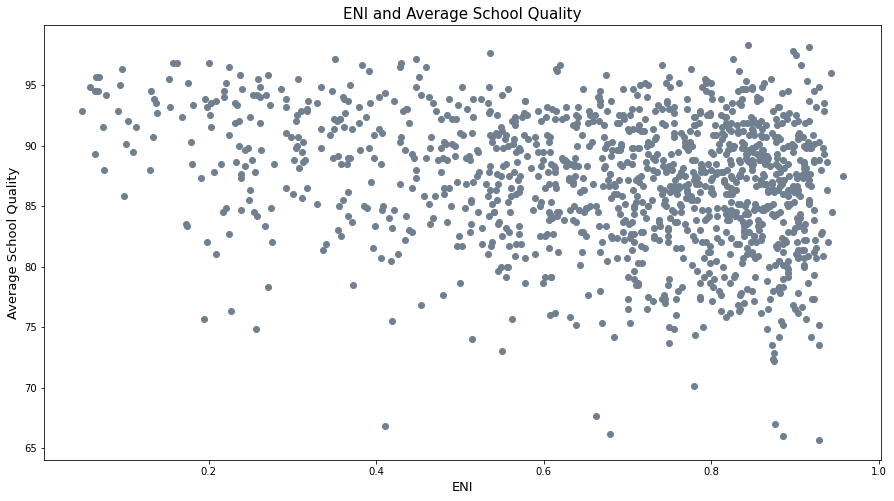

In [90]:
fig, ax = plt.subplots(figsize = (15, 8))
plt.plot('Economic Need Index', 'Average Quality', 'o', color = 'slategrey', data = data)
plt.title('ENI and Average School Quality', fontsize = 15)
plt.xlabel('ENI', fontsize = 13)
plt.ylabel('Average School Quality', fontsize = 13)
ax.spines[['top', 'right']].setvisible = False

While both ENI and measures of school quality exhibit clear relationships with academic performance at a school, the relatiaonship between ENI and average school quality is only weakly negative. While more economically disadvantaged schools are less likely to have high quality scores, the variance in data is high for high ENI schools, and many schools with high economic need score high on average school quality as well.

This relationship is unexpected, and will be discussed in more detailed further on. However, the weak collinearity between the two predictors in spite of their relatively stronger correlation with academic performance suggests that the effects of each predictor on academic performance are independent of one another. That is, both improved economic circumstances and higher quality of schools can improve student outcomes.

# Project Two

In [91]:
#Adding new dataset about SHSAT data for 579 of the schools in our dataset schools (not just District 5)

SHSAT = pd.read_csv('~/ECO225 Project/Data/2016-2017_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
SHSAT = SHSAT.rename({'Feeder School Name': 'School Name', 
                              'Count of Students in HS Admissions': 'Grade 8 Enrollment'}, axis = 1)

def registered(df):
    if df == '0-5':
        return 0
    else:
        return float(df)

SHSAT['Count of Testers'] = SHSAT['Count of Testers'].apply(registered)
SHSAT['Count of Offers'] = SHSAT['Count of Offers'].apply(registered)
SHSAT['SHSAT Participation Proportion'] = SHSAT['Count of Testers'] / SHSAT['Grade 8 Enrollment']
SHSAT['SHSAT Offers Proportion'] = SHSAT['Count of Offers'] / SHSAT['Grade 8 Enrollment']

school.set_index('School Name')
SHSAT.set_index('School Name')

SHSATdata = pd.merge(data, SHSAT, how = 'inner')

### SHSAT Participation and Results Data

Thus far, we have assumed that average academic performance, as measued by the average between a school's average Math proficiency and average ELA proficiency scores, were indicative of student success, anad hence its propensity to send its students to New York's Specialized High Schools. Implicitly, the argument up to now has taken as given that students at schools with greater academic performance are first, more likely to have its students participate in the SHSAT, and second, more likely to perform better and receive offers as a result. Therefore, we've explored the data to determine what variables best predict academic outcomes in hopes of using the findings to improve SHSAT participation and success in the Black and Hispanic student population.

In order to validate this core assumption and the findings in general, we search to establish a link between academic performance and participation and performance in the SHSAT. To do so, we make use of data from the New York City Department of Education (NYCDOE).

With the SHSAT dataset from the NYCDOE, we have data on 579 New York City schools regardding three main variables: the number of Grade 8 students enrolled, the number of Grade 8 students who took the SHSAT, and the number of Gradae 8 students who received offers from a New York City Specialized High School. With these columns, we generate two more columns measuring the proportion of Grade 8 students who took the tests, and the proportion of students who received offers.

Although these measures of SHSAT participation may be more indicative of the likelihood for a given school to send its students to a Specialized High School, the NYCDOE SHSAT dataset only contains data for 579 schools (the NYC School Demographics dataset contains data on 1269 schools). Furthermore, we show that academic performance and SHSAT participation proportion, as well as offer proportions, are strongly positively correlated, justifying the implicit assumptions made above. Therefore, while the SHSAT data may be useful to analyze the subset of New York Schools there is data on, using ELA and Math scores instead allows us to sample a much larger popoulation of New York City schools

Count of Testers  Count of Offers
count        579.000000       579.000000
mean          42.146805         6.766839
std           59.729125        22.123573
min            0.000000         0.000000
25%           10.500000         0.000000
50%           22.000000         0.000000
75%           44.000000         0.000000
max          396.000000       268.000000

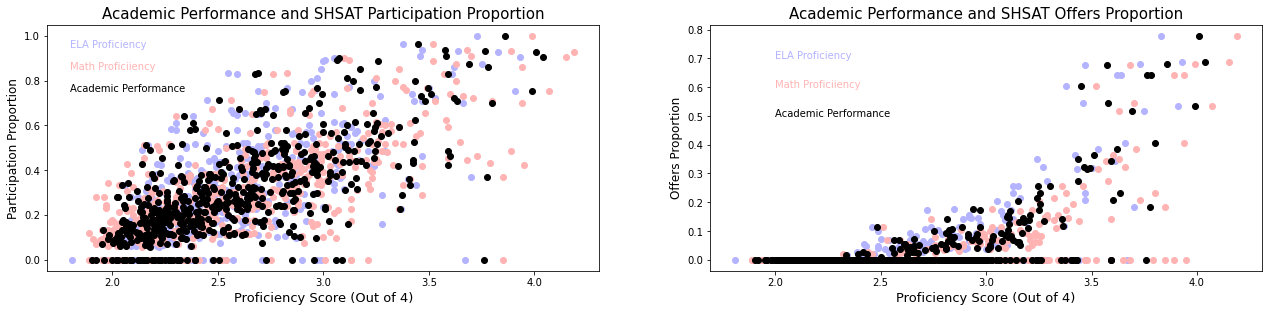

In [92]:
import matplotlib.colors as mplc
blue = mplc.hsv_to_rgb((240/360, 0.3, 1))
red = mplc.hsv_to_rgb((0, 0.3, 1))

fig, ax = plt.subplots(1, 2, figsize = (9,9))

subjects = ['Average ELA Proficiency', 'Average Math Proficiency', 'Academic Performance']
graphs = ['SHSAT Participation Proportion', 'SHSAT Offers Proportion']
colors = [blue, red, 'black']
labels = ['ELA Proficiency', 'Math Proficiiency', 'Academic Performance']
positions = [[(1.8, 0.95), (1.8, 0.85), (1.8, 0.75)], [(2, 0.7), (2, 0.6), (2, 0.5)]]
titles = ['Participation Proportion', 'Offers Proportion']
i = 0

for g, t in zip(graphs, titles):
    for s, c, l, p in zip(subjects, colors, labels, positions[i]):
        ax[i].plot(s, g, 'o', color = c, data = SHSATdata)
        ax[i].annotate(l, xy = p, color = c)
        ax[i].set_title('Academic Performance and SHSAT ' + t, fontsize = 15)
        ax[i].set_xlabel('Proficiency Score (Out of 4)', fontsize = 13)
        ax[i].set_ylabel(t, fontsize = 12)
    i += 1
plt.subplots_adjust(right = 2, bottom = 0.5)

SHSATdata[['Count of Testers', 'Count of Offers']].describe()

As is evident by the plots above, there is strong positive correlation between proficiency in Math and English, as well as academic performance overall, and the amount of Grade 8 students who participate in the SHSAT and who receive offers. Notably, there are a significant number of schools with participation and offer proportions of zero. This is to be expected; given the limited number of spots in New York's Specialized High Schools, most schools will have no acceptances. Nevertheless, there is a clear positive trend between a school's academic performance and the proportion of its students who receive offers. Furthermore, the relationship between academic proficiency and SHSAT participation is even more strongly defined. Only 3 schools with average proficiency scores above 3.0 do not have students participating in the SHSAT.

These plots therefore justify the use of average academic performance in Math and ELA proficiency tests as the main dependent variable. It is clear that students attending more academic schools are more likely to have take the SHSAT, and more likely to receive offers. Therefore, targetting factors to improve academic performance in schools with more Black and Hispanic students will plausibly have the effect of also improving the representation of Black and Hispanic students in New York's Specialized High Schools.

### The Main Message

Black and Hispanic students are underrepresented in New York City's Specialized High Schools. In Project 1, we found that schools with more Black and Hispanic students score lower on both Math and English proficiency tests. These schools also tend to have a higher Economic Need Index, and lower scores of school quality. Both of these factors have been found to have detrimental effects on students' educational attainment, and hence may explain some of the discrepency in the demographics of New York's Specialized High Schools.

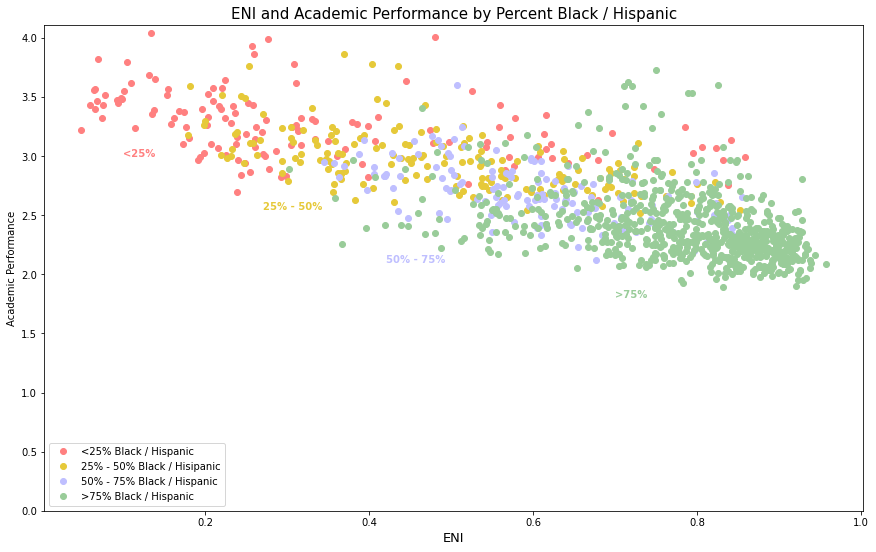

In [93]:
hue = [0, 50, 240, 120]
sat = [0.5, 0.75, 0.25, 0.25]
val = [1, 0.9, 1, 0.8]
quality_colors  = []
for i, j, z in zip(hue, sat, val):
    quality_colors.append(mplc.hsv_to_rgb((i/360, j, z)))

fig, axs = plt.subplots(figsize = (13, 10))
c = 0
for i, p in zip(BH_description, [(0.1, 3), (0.27, 2.55), (0.42, 2.1), (0.7, 1.8)]):
    plt.plot('Economic Need Index', 'Academic Performance', 'o',
             color = quality_colors[c], data = data[data['BH Description'] == i])
    plt.annotate(i, p, color = quality_colors[c], weight = 'bold')
    c += 1
    plt.xlabel('ENI', fontsize = 13)
    plt.ylabel('Academic Performance', fontsize = 10)
    plt.ylim(0)
    plt.title('ENI and Academic Performance by Percent Black / Hispanic', fontsize = 15)
    plt.legend(['<25% Black / Hispanic', '25% - 50% Black / Hisipanic',
                '50% - 75% Black / Hispanic', '>75% Black / Hispanic'])
plt.subplots_adjust(right = 1, top = 0.8)

The above plot shows that ENI can explain some—but not all—of the differences in Academic Performance between schools with more Black and Hispanic students and those with a smaller Black and Hispanic population. Splitting the schools in the dataset by the percentage of Black or Hispanic students, it is clear that the most disadvantaged schools have significnaalty higher Black and Hispanic popoulations than schools with less economic need. The average performance for the schools is also as discussed prior.

Strinkingly, however, we see that especially for the most disadvantaged schools, those with higher proportions of Black and Hispanic students continue to underperform compared to schools with fewer Black or Hispanic students. This pattern is most visible between schoolos with ENIs of between 0.3 amd 0.8. The plot therefore suggests that while ENI is correlated with performance, given similar ENIs, schools with more Black and Hispanic students still underperform. In other words, there are other covariates that cause Black and Hispanic students to underperform aside from a school

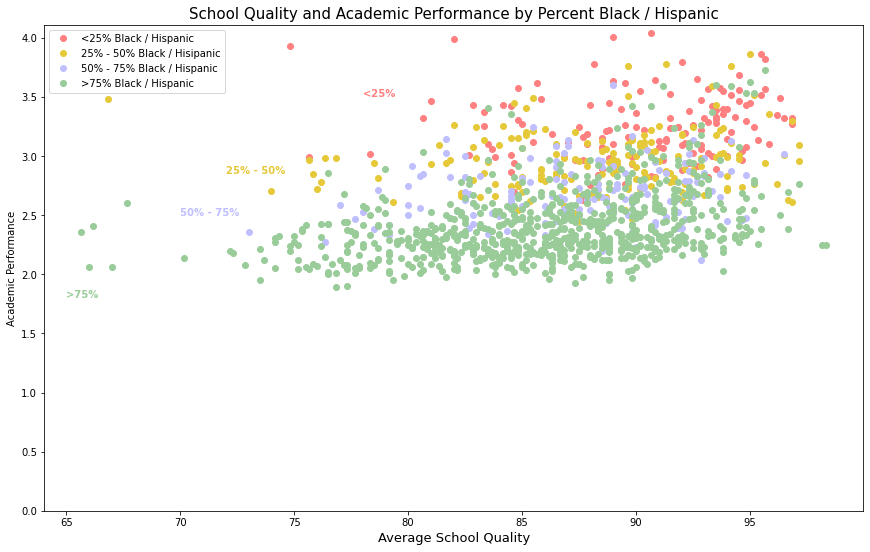

In [94]:
fig, axs = plt.subplots(figsize = (13, 10))
c = 0
for i, p in zip(BH_description, [(78, 3.5), (72, 2.85), (70, 2.5), (65, 1.8)]):
    plt.plot('Average Quality', 'Academic Performance', 'o',
             color = quality_colors[c], data = data[data['BH Description'] == i])
    plt.annotate(i, p, color = quality_colors[c], weight = 'bold')
    c += 1
    plt.xlabel('Average School Quality', fontsize = 13)
    plt.ylabel('Academic Performance', fontsize = 10)
    plt.ylim(0)
    plt.title('School Quality and Academic Performance by Percent Black / Hispanic', fontsize = 15)
    plt.legend(['<25% Black / Hispanic', '25% - 50% Black / Hisipanic',
                '50% - 75% Black / Hispanic', '>75% Black / Hispanic'])
    
    
    
plt.subplots_adjust(right = 1, top = 0.8)

A similar trend is seen when we replace ENI with average school quality. Looking at the relationships between average school quality, average academic performance, and the proportion of Black and Hispanic students, we see that while a higher school quality is associated witht better academic performance, as is having fewer Black and Hispanic students. While schools with more Black or Hispanic students tend to have lower quality ratings, given the same quality, schools with <25% Black or Hispanic students significantly outperform those with >75% Black or Hispanic students.

Howvever, this plot suggests that average school quality, while positively correlated with academic performance, is not the strongest predictor of a given schools performace. Namely, while each subgroup of Black and Hispanic population exhibits a positve trend between school quality and academic performanace, there seems to also be fixed level effects from simply being in a different percentage grouping of Black and Hispanic student population. Schools with between 50% and 70% Black students seem to havee average proficiency scores 0.5 greater than schools with more than 75% Black and Hispanic students, independent of school quality. Schools with fewer than 25% Black and Hispanic students' scores are a full 1.0 point greater than those with 75% or more Black and Hispanic students.

### The Main Message, again

These two plots encapsulate the trends discussed above. Schools with more Black and Hispanic students are more economically disadvantaged, are less likely to be high quality, and perform worse on proficiency tests. However, it is clear that while a definite trend exists for both, they are unable to completely explain the variation in academic performance alone.

### Geospatial Visualization

The nature socioeconomics would suggest that schools with higher ENI scores are likely to be within close proximity to each other. As New York City public schools are in part funded by local property taxes, the wealth of neighbourhoods can be visualized on a map. We expect schools with high ENI scores to be near each other, and distictly separate from less economically disadvantaged schools.

In contrast, while quality of school may be correlated with economic need, its qualitative nature means may allow for more interschool variation, unlike economic need, which is a quantitative measure. As shown above, though there is a slight negative correlation, school quality is not completely determined by ENI. If this is the case, zip codes with high ENI scores may not necessarily have low school quality measures.

In [95]:
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [96]:
#! pip install bokeh

In [97]:
import geopandas as gpd
from shapely.geometry import Point
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file, save
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
from bokeh.models.widgets import Panel, Tabs
import json

Loading BokehJS ...

In [98]:
NYCzip = gpd.read_file('~/ECO225 Project/data/ZIP_CODE_040114.zip')
NYCzip['ZIPCODE'] = NYCzip['ZIPCODE'].astype(int)
MAPzip = data.groupby('Zip')

map_data = pd.DataFrame(MAPzip[['Academic Performance', 'Economic Need Index']].mean()).reset_index()

means = ['ELAmeans', 'mathmeans', 'pctB', 'pctH', 'pctA', 'pctW', 'pctBH', 'qualitymean']
columns = ['Average ELA Proficiency', 'Average Math Proficiency',
 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent White', 'Percent Black / Hispanic', 'Average Quality']

for m, c in zip(means, columns):
    map_data[m] = pd.DataFrame(MAPzip[c].mean()).reset_index()[c]

NYCzip = NYCzip.merge(map_data, left_on = 'ZIPCODE', right_on = 'Zip', how = 'inner')
NYCzip = NYCzip.rename({'Academic Performance': 'academics'}, axis = 1)
NYCgeo = GeoJSONDataSource(geojson = NYCzip.to_json())

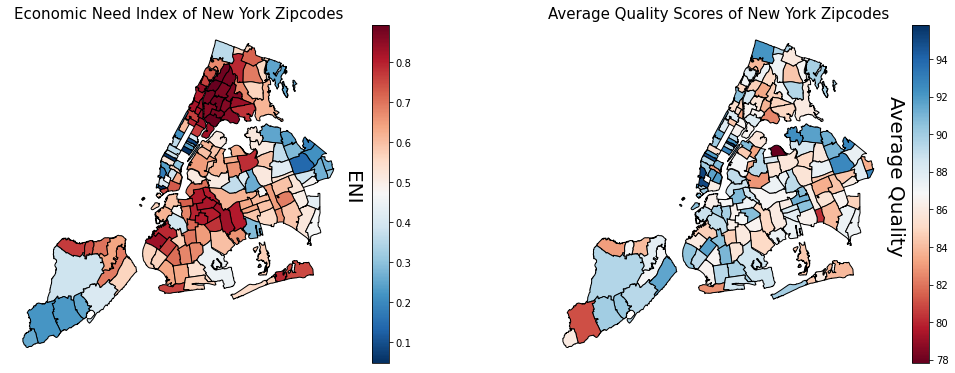

In [99]:
fig, (gax1, gax2) = plt.subplots(1, 2, figsize = (10, 4))

NYCzip.plot(ax = gax1, edgecolor = 'black', column = 'Economic Need Index', legend = True, cmap = plt.cm.get_cmap('RdBu_r'))
gax1.set_title('Economic Need Index of New York Zipcodes', fontsize = 15)
gax1.annotate('ENI',xy=(0.475, 0.6),  xycoords='figure fraction', fontsize = 20, rotation = 270)
gax1.spines[['top', 'right']].set_visible(False)
gax1.axis('Off')


NYCzip.plot(ax = gax2, edgecolor = 'black', column = 'qualitymean', legend = True, cmap = plt.cm.get_cmap('RdBu'))
gax2.set_title('Average Quality Scores of New York Zipcodes', fontsize = 15)
gax2.annotate('Average Quality',xy=(1.23, 0.42),  xycoords='figure fraction', fontsize = 20, rotation = 270)
gax2.spines[['top', 'right']].set_visible(False)
gax2.axis('Off');

plt.subplots_adjust(right = 1.5, top = 1.3)

By calculating the average ENI score and average quality of each county, we see that while the most disadvantaged zip codes—namely the zip codes surrounding The Bronx—do tend to have low average school quality, there many zip codes whose schools have high ENI do not have low average qualities. This therefore provides evidence for the claim that school quality is determined relatively independently of ENI. If school quality were

In [100]:
RdYlBu = brewer['RdYlBu'][10]
BuYlRd = list(RdYlBu)
BuYlRd.reverse()
BuYlRd = tuple(BuYlRd)

hover = HoverTool(tooltips = [('Zip','@ZIPCODE'), ('Average ELA Proficiency', '@ELAmeans'), 
                              ('Average Math Proficiency', '@mathmeans'),
                              ('Average Academic Performance', '@academics'), ('Percent Black', '@pctB %'),
                              ('Percent Hispanic', '@pctH %'), ('Percent Asian', '@pctA %'),
                              ('Percent White', '@pctW %'), ('ENI', '@Economic Need Index'),
                              ('Average Quality', '@qualitymean')])



color_mapper1 = LinearColorMapper(palette = BuYlRd)
color_bar1 = ColorBar(color_mapper = color_mapper1, label_standoff = 8, width = 500, height = 20,
                     border_line_color = None, location = (0,0), orientation = 'horizontal')
p1 = figure(title = "New York City Zip Code Average Academic Performances", tools=[hover])
p1.patches("xs", "ys", source=NYCgeo,
          fill_color = {'field' :'academics', 'transform' : color_mapper1})
p1.add_layout(color_bar1, 'below')
p1.axis.visible = False



color_mapper2 = LinearColorMapper(palette = RdYlBu)
color_bar2 = ColorBar(color_mapper = color_mapper2, label_standoff = 8, width = 500, height = 20,
                     border_line_color = None, location = (0,0), orientation = 'horizontal')
p2 = figure(title = "New York City Zip Code Average ENI", tools=[hover])
p2.patches("xs", "ys", source=NYCgeo,
          fill_color = {'field' :'Economic Need Index', 'transform' : color_mapper2})
p2.add_layout(color_bar2, 'below')
p2.axis.visible = False




color_mapper3 = LinearColorMapper(palette = BuYlRd)
color_bar3 = ColorBar(color_mapper = color_mapper3, label_standoff = 8, width = 500, height = 20,
                     border_line_color = None, location = (0,0), orientation = 'horizontal')
p3 = figure(title = "New York City Zip Code Average Quality Score", tools=[hover])
p3.patches("xs", "ys", source=NYCgeo,
          fill_color = {'field' :'qualitymean', 'transform' : color_mapper3})
p3.add_layout(color_bar3, 'below')
p3.axis.visible = False



tab1 = Panel(child = p1, title= "Academic Performance")
tab2 = Panel(child = p2, title= "ENI")
tab3 = Panel(child = p3, title = 'Quality')
    
tabs = Tabs(tabs=[tab1, tab2, tab3])

show(tabs)

In [101]:
#output_file(filename = "NYC_Academics_ENI_Quality_Maps.html",
#            title="New York City Schools' Academic Performance, ENI, and Quality")
#save(tabs)

Howeveer, when the average academic proficiency of the schools in a zip code are plotted, it is clear that, at least on a zip code wide scale, the effects of ENI dominate that of differing qualities. Although there is evidence to suggest that quality of school can deviate from what the school's ENI would suggest, for any given zip code, the average school's academic performances reflect the level of economic need in the zip code as opposed to the school's quality.

## Project 3

### Web Scraping
In Project 1, we mainly considered data collected per school. The data from the NYCDOE provided insight on the demographics and performances of individual schools across New York City. In Project 2, we aggregated the data from schools into zipcode wide data to compare the performamnces of the average school across zipcodes.

In doing so, we were able to gain more insight into how a school's location is related to their academic performance, and how ENI and school quality relate to physical geography. Furthermore, by looking at data across zipcodes, we can continue the analysis with more diverse data. Namely, on top of analyzing data on individual schools, analyzing zizpcodes allows us to use data on the zipcode scale as well.

#### Education of Zipcodes
For example, TownCharts.com consolidates data from the American Community Survey (conducted by the US Census Bureau) by zipcode. One particularly interesing variable that could be studied is the average level of education attained in each zipcode. This data is not available in the NYCDOE school dataset, and so is not included in our aggregation when we look at variables zipcode by  zipcode. However, parents' education levels may important to consider. Davis-Kean (2005) found that parents' education levels are significantly related to academic performance of school aged children, and that the level of correlation differed by race. Furthermore, Dubow, Boxer, and Huesmann (2009) find that parents' education levels can predict attainment of education and occupational success throughout their children's lives. Given the prestige of New York City's Specialized High Schools, there could perhaps be some significant relationship seen between the average educational attainment in a zipcode and the performance of schools within that zipcode. As the TownCharts.com website provides data by zipcode, scraping the website would entail going through each page corresponding to a zipcode in New York City, and recording a row of data for each zipcode in New York City on the information that the webpage details. Then, since the scraped data would be per zipcode, it could be merged into the prexisting geodataframe by zipcode, and then graphed and statistically analyzed.

As the average educational attainment of a zipcode is not likely to change frequently, for the purpose of this paper, a single scrape would suffice. However, the American Community Survey is conducted annually, and so for policy decisions, it may be relevant to scrape the website each year to determine changes in a factor that may contribute to the problem at hand.

However, in order to scrape TownCharts.com, a webpage for each zipcode must be scraped; the data for each zipcode is not on one single page, but rather on individually linked pages. As such, it cannot be scraped with simple html scraping methods. 

#### Population Metrics
On top of the average educational attainment of a zipcode, other simple demographic data might be relvant. For example, the population of a zipcode might be associated with the amount of resources dedicated to schools, or the average student teacher ratio, and hence school quality and academic performance. Alternatively, the population size of a zipcode may be related to socioeconnomic factors, namely ENI, and thus academic performance.

To inspect these potential relationships, we can scrape data from Cubit Demographics's article listing out New York City's zipcodes and their populations.

In [102]:
import requests
import bs4 as BeautifulSoup

#loading the website from which data is being scraped
url = 'https://www.newyork-demographics.com/zip_codes_by_population'
response = requests.get(url)

#Parsing the HTML code so that we can access the specific elements of the website (the table, its rows, and the entries).
soup = BeautifulSoup.BeautifulSoup(response.content)

#Identifying the table in the HTML from which we want to scrape.
table = soup.find_all('table', 'ranklist')[0]
values = table.find_all('tr')

#Generating a dataframe to input the data we will get from scraping the table.

popdf = pd.DataFrame(columns = ['zipcode', 'population'])
i = 0

for row in values[1:1585]:  #Going through each row of the table on the website
    info = row.find_all('td')  #Finding all elements of the row, each are stored in a class called 'td'
    
    if 'and' not in info[1].text.strip(): 
        zipcode = info[1].text.strip()  # Storing the 5 digit zipcode of the row
        population = int(info[2].text.strip().replace(',','')) # Storing the population of the zipcode in that row
        popdf.loc[i] = [zipcode, population] # Filling up the dataframe we created with the data from the row
        i += 1
        
    else: # Some zipcodes have the same populations, so are listed in the same row / entry separated by 'and'
        zipcode1 = info[1].text.strip()[0:4] # Storing the first 5 digit zipcode.
        zipcode2 = info[1].text.strip()[-5:] # Storing the last 5 digit zipcode.
                                             # Only the instances where there are 2 zipcodes are relevant for us.
        population = int(info[2].text.strip().replace(',',''))
        popdf.loc[i] = [zipcode1, population]
        popdf.loc[i + 1] = [zipcode2, population]
        i += 2
# Though there are a few instances of 3 or more zipcodes tied in population, the above code addresses instances where only 
# 2 zipcodes are tied. However, this is sufficient for the zipcodes in New York City (the website contains all zipcodes 
# in the state of New York), which is all our analysis needs.


# Merging the scraped data into a new dataset.
popdf['zipcode'] = popdf['zipcode'].astype(int)
NYCzip = NYCzip.merge(left_on = 'ZIPCODE', right = popdf, right_on = 'zipcode', how = 'left')

With the population data that we scraped, we can inspect the relationship between population and race, as well as the relationship between the size of a county and its average ENI, quality, and Academic Performance.

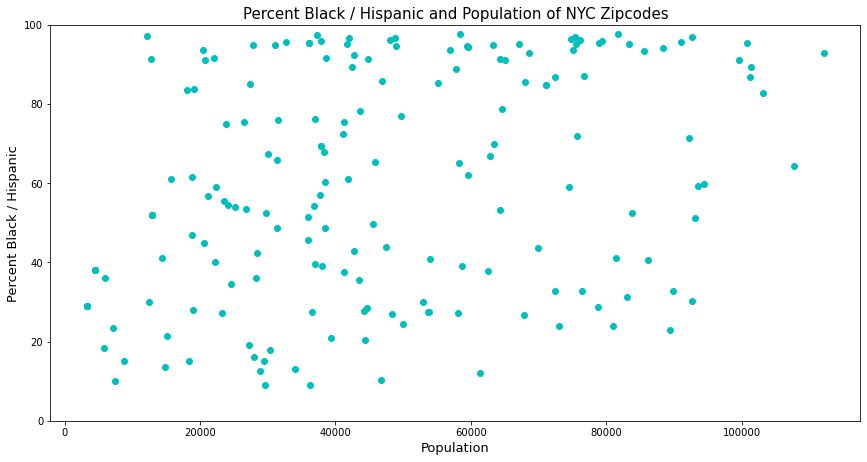

In [103]:
fig, ax = plt.subplots()
plt.plot(NYCzip['population'], NYCzip['pctBH'], 'o', color = 'c')
plt.title('Percent Black / Hispanic and Population of NYC Zipcodes', fontsize = 15)
plt.xlabel('Population', fontsize = 13)
plt.ylim(0, 100)
plt.ylabel('Percent Black / Hispanic', fontsize = 13)
ax.spines[['top', 'right']].setvisible = False
plt.subplots_adjust(right = 2, top = 1.5)

The data show that for the 179 zipcodes in New York City, there is not a clear pattern between the percentage of students who are Black or Hispanic and the population of the zipcode.

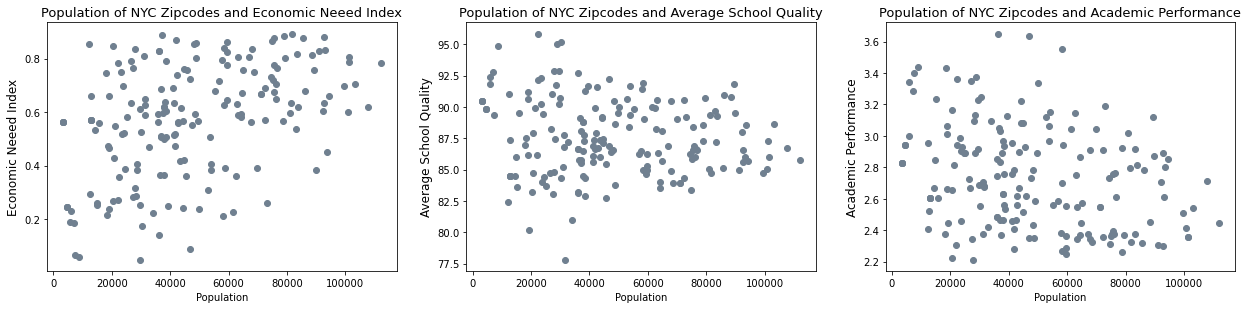

In [104]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

i = 0
y = ['Economic Neeed Index', 'Average School Quality', 'Academic Performance']
for variable in [NYCzip['Economic Need Index'], NYCzip['qualitymean'], NYCzip['academics']]:
    ax[i].plot(NYCzip['population'], variable, 'o', color = 'slategrey')
    ax[i].set_xlabel('Population', fontsize = 10)
    ax[i].set_ylabel(y[i], fontsize = 12)
    ax[i].set_title('Population of NYC Zipcodes and ' + y[i], fontsize = 13)
    
    i += 1
    
plt.subplots_adjust(right = 1.5, top = 0.7)

Interestingly, there seems to be some systematic pattern between a zipcode's population size and its ENI, average school quality, and academic performance. The trend is seemingly positive for ENI, and somewhat negative for school quality and academic performance. However, the variance is large, so more rigorous statistical techniques will need to be used to determine whether the relation is significant or not.

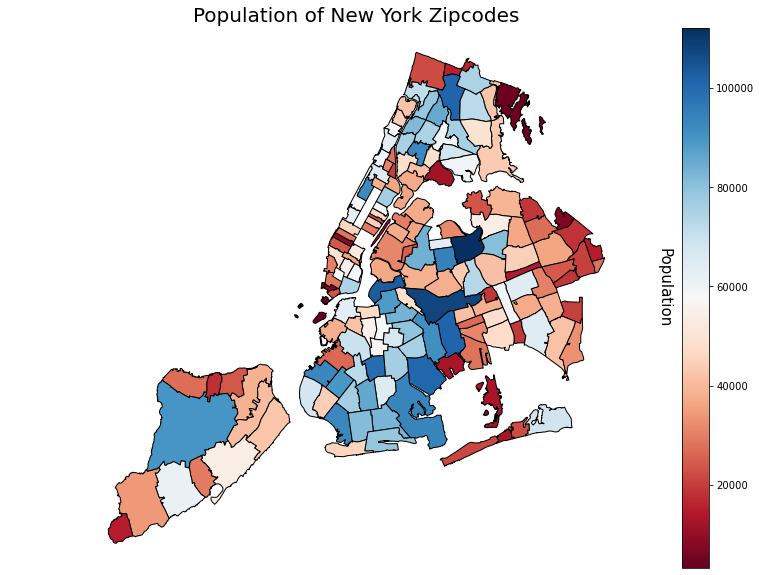

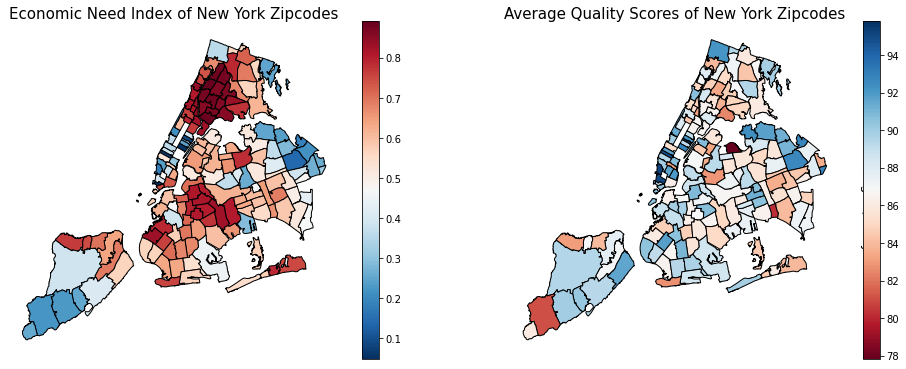

In [105]:
fig, gax = plt.subplots()

NYCzip.plot(ax = gax, edgecolor = 'black', column = 'population', legend = True, cmap = plt.cm.get_cmap('RdBu'))
gax.set_title('Population of New York Zipcodes', fontsize = 20)
gax.annotate('Population',xy=(1.52, 0.87),  xycoords='figure fraction', fontsize = 15, rotation = 270)
gax.spines[['top', 'right']].set_visible(False)
gax.axis('Off');

plt.subplots_adjust(right = 3.45, left = 1, top = 2)

fig, (gax1, gax2) = plt.subplots(1, 2, figsize = (10, 4))

NYCzip.plot(ax = gax1, edgecolor = 'black', column = 'Economic Need Index', legend = True, cmap = plt.cm.get_cmap('RdBu_r'))
gax1.set_title('Economic Need Index of New York Zipcodes', fontsize = 15)
gax1.annotate('ENI',xy=(0.5, 0.6),  xycoords='figure fraction', fontsize = 13, rotation = 270)
gax1.spines[['top', 'right']].set_visible(False)
gax1.axis('Off')


NYCzip.plot(ax = gax2, edgecolor = 'black', column = 'qualitymean', legend = True, cmap = plt.cm.get_cmap('RdBu'))
gax2.set_title('Average Quality Scores of New York Zipcodes', fontsize = 15)
gax2.annotate('Average Quality',xy=(1.195, 0.42),  xycoords='figure fraction', fontsize = 13, rotation = 270)
gax2.spines[['top', 'right']].set_visible(False)
gax2.axis('Off');

plt.subplots_adjust(right = 1.4, top = 1.3)

Visualizing population and the main predictors on a map, we can see that the most populous zipcodes do indeed have higher ENIs than zipcodes with lower populations. This is significant as it would suggest that there are more people, and hence more students, who are living in areas that are relatively poorer than the rest of the of city. On the other hand, as we noted above, quality of schooling seems to be relatively independent of population. While regions of lesser populated zipcodes may have slightly higher average quality of schools, the trend is not cocnsistent across the entire city.

Also, the visualizations also show that zipcodes with high populations, high ENIs, and to a lower extent low average qualities are not randomly scattered throughout the city. Many of the most populated zipcodes are adjacent to one another, and this is seen in ENI and school quality as well. There may thus be value in prioritizing aid by regions instead of zipcode, which might also improve efficiency in any of PASSNYCs programs.

### The Main Message - Significance of Population

The findings from the data that was scraped are significant. Namely, there is importance behind the fact that zipcodes with the highest ENIs tend to have high populations. Given this, if we find that ENI is indeed the main determinant of academic performance, addressing the most disadvantaged areas might also have the effect of helping the highest number of students. Given the strong positive relationship we observed between ENI and the proportion of Black and Hispanic students in schools, providing assistance to the most populous, highest ENI zipcodes will might help disadvantaged Black and Hispanic students in New York City, and may promote registration, participation, and success on the SHSAT, narrowing the gap between Black and Hispanic students and their counterparts in the makeup of New York City's Specialized High Schools.

## Conclusion
As the EDA has shown, Black and Hispanic students are generally disadvantaged compared to Asian and White students. Schools with higher proportions of Black or Hispanic students have higher ENIs, and lower average scores on measures of school quality. As a result, schools with high Black and Hispanic student populations underperform in Math and ELA proficiency tests. These factors, along with other omitted exogenous variables, have culminated into a disproportionate representation of New York's students in Specialized High Schools. Thus, identifying which of the factors best predict academic performance may provide insight on the most effective schools to target to absolve the distored demographics in New York City's top schools.

Specifically, while both ENI and school quality's relationships with academic performance—which serves as a strong proxy for SHSAT participation and success—are as expected, the correlation between the two is not as definite. On top of there being large variance in scatter plots of the two main predictors, mapping out the data show that zip codes with high economic need do not necessarily have low quality schools. However, academic performance does tend to be determined moreso by ENI than average school quality.

Regardless, the plots above show that both ENI and school quality might serve to explain some of the variation in academic performance between schools with more Black or Hispanic students and schools with a lower proportion. Individually, ENI seems to be the better predictor. However, ENI alone is still unable to account for all the differences between high proportion and low proportion schools. Therefore, more  rigorous statistical analysis, namely linear regression, must be conducted to determine the ceteris paribus effects of ENI and measures of school quality on academic performance.

Furthermore, population data sourced from other sources also suggest that addressing the needs of the most economically disadvantaged neighbourhoods also has the effect of providing assistance to the most students. Based on geographical visualizations, the most populated zipcodes also tend to have more low ENI schools. Although the application of this to regression may be limited, it may be an important factor to consider when deciding how to most efficiently support Black and Hispanic students; rather than focusing on individual schools, PASSNYC may find it more effective to identify and provide support on the zipcode level.

## Works Cited

Adams, Kimberly S, and Sandra L Christenson. 2000. “Trust and the Family–School Relationship Examination of Parent–Teacher  Differences in Elementary and Secondary Grades.” Journal of School Psychology 38 (5): 477–97. doi:10.1016/s0022-4405(00)00048-0. 

Brownwell, Marni, Ben Levin, Lauren Yallop, Leonard MacWilliam, Anne Guevremont, L. L. Roos, Randy Fransoo, and Noralou Roos. 2006. “Is the Class Half Empty? A Population-Based Perspective on Socioeconomic Status and Educational Outcomes.” International Review of Public Policy 12 (October): 1–30. 

Davis-Kean, Pamela E. “The Influence of Parent Education and Family Income on Child Achievement: The Indirect Role of Parental Expectations and the Home Environment.” Journal of Family Psychology 19, no. 2 (June 2005): 294–304. https://doi.org/10.1037/0893-3200.19.2.294. 

Dubow, Eric F., Paul Boxer, and L. Rowell Huesmann. “Long-Term Effects of Parents' Education on Children's Educational and Occupational Success: Mediation by Family Interactions, Child Aggression, and Teenage Aspirations.” Merrill-Palmer Quarterly 55, no. 3 (July 2009): 224–49. https://doi.org/10.1353/mpq.0.0030. 

Forget-Dubois, Nadine, Jean-Pascal Lemelin, Michel Boivin, Ginette Dionne, Jean R. Séguin, Frank Vitaro, and Richard E. Tremblay. 2007. “Predicting Early School Achievement with the EDI: A Longitudinal Population-Based Study.” Early Education &amp; Development 18 (3): 405–26. doi:10.1080/10409280701610796. 

“Framework &amp; School Survey Scoring Technical Guide 2016 - 2017.” 2017. New  York City. 
Gilman, Rich, and E. Scott Huebner. 2006. “Characteristics of Adolescents Who Report Very High Life Satisfaction.” Journal of Youth and Adolescence 35 (3): 293–301. doi:10.1007/s10964-006-9036-7. 

Gilman, Rich, and E. Scott Huebner. 2006. “Characteristics of Adolescents Who Report Very High Life Satisfaction.” Journal of Youth and Adolescence 35 (3): 293–301. doi:10.1007/s10964-006-9036-7. 

Imber, Steve. 1973. “Relationship of Trust to Academic Performance.” Journal of Personality and Social Psychology 28 (1): 145–50. doi:10.1037/h0035644. 

In, Hyoyeon, Hyunhee Kim, and JoLynn V. Carney. 2019. “The Relation of Social Skills and School Climate of Diversity to Children's Life Satisfaction: The Mediating Role of School Connectedness.” Psychology in the Schools 56 (6): 1023–36. doi:10.1002/pits.22247. 

Janus, Magdalena, and Eric Duku. 2007. “The School Entry Gap: Socioeconomic, Family, and Health Factors Associated with Children's School Readiness to Learn.” Early Education &amp; Development 18 (3): 375–403. doi:10.1080/10409280701610796a. 

Mitchell, Roxanne M., Lisa A. Kensler, and Megan Tschannen-Moran. 2015. “Examining the Effects of Instructional Leadership on School Academic Press and Student Achievement.” Journal of School Leadership 25 (2): 223–51. doi:10.1177/105268461502500202. 

“New York Education Data.” Towncharts Education data. Accessed March 23, 2022. https://www.towncharts.com/New-York/New-York-state-Education-data.html. 

“New York ZIP Codes by Population.” New York Outline. Accessed March 24, 2022. https://www.newyork-demographics.com/zip_codes_by_population. 

O’Connor, Erin, and Kathleen McCartney. 2007. “Examining Teacher–Child Relationships and Achievement as Part of an Ecological Model of Development.” American Educational Research Journal 44 (2): 340–69. doi:10.3102/0002831207302172. 

Ren, Xuezhu, Yan Tong, Peng Peng, and Tengfei Wang. 2020. “Critical Thinking Predicts Academic Performance beyond General Cognitive Ability: Evidence from Adults and Children.” Intelligence 82: 101487. doi:10.1016/j.intell.2020.101487. 

Ross, Steven M., Lana J. Smith, Jason Casey, and Robert E. Slavin. 1995. “Increasing the Academic Success of Disadvantaged Children: An Examination of Alternative Early Intervention Programs.” American Educational Research Journal 32 (4): 773–800. doi:10.3102/00028312032004773. 

Stupnisky, Robert H., Robert D. Renaud, Lia M. Daniels, Tara L. Haynes, and Raymond P. Perry. 2008. “The Interrelation of First-Year College Students’ Critical Thinking Disposition, Perceived Academic Control, and Academic Achievement.” Research in Higher Education 49 (6): 513–30. doi:10.1007/s11162-008-9093-8. 